Dataset Loaded Successfully!
Shape: (178, 14)


,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735



Columns: ['Type', 'Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols', 'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color', 'Hue', 'Dilution', 'Proline']

Missing values per column:
 Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

Detected label column (not used for PCA/KMeans): Type

Numeric features used: ['Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols', 'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color', 'Hue', 'Dilution', 'Proline']


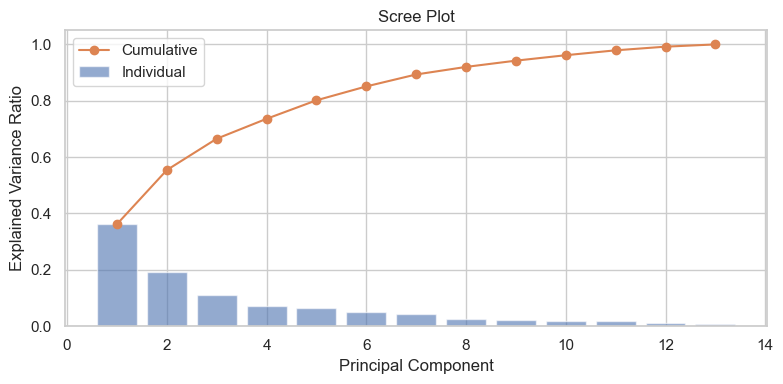


Selected n_components = 8 (covers ≥90% variance)


,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [1]:
# ============================================================
# PCA + K-MEANS (wine dataset)
# ============================================================

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

sns.set(style="whitegrid", rc={"figure.figsize": (8,5)})

# ---------- 1) Load dataset ----------
df = pd.read_csv(r"C:\Users\abhin\Downloads\wine (1).csv")

print("Dataset Loaded Successfully!")
print("Shape:", df.shape)
display(df.head())

# ---------- 2) Quick EDA ----------
print("\nColumns:", list(df.columns))
print("\nMissing values per column:\n", df.isnull().sum())

# Detect label column if exists
label_col = None
for col in [df.columns[0], df.columns[-1]]:
    if pd.api.types.is_integer_dtype(df[col]) and df[col].nunique() <= 10:
        label_col = col
        break

if label_col:
    print("\nDetected label column (not used for PCA/KMeans):", label_col)
    X = df.drop(columns=[label_col]).select_dtypes(include=[np.number])
else:
    X = df.select_dtypes(include=[np.number])

print("\nNumeric features used:", list(X.columns))

# ---------- 3) Scaling ----------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ---------- 4) PCA ----------
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

explained = pca.explained_variance_ratio_
cum_explained = np.cumsum(explained)

plt.figure(figsize=(8,4))
plt.bar(range(1, len(explained)+1), explained, alpha=0.6, label='Individual')
plt.plot(range(1, len(cum_explained)+1), cum_explained, '-o', color='C1', label='Cumulative')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.legend()
plt.tight_layout()
plt.show()

# choose components with >= 90% variance
n_components = np.argmax(cum_explained >= 0.90) + 1
print(f"\nSelected n_components = {n_components} (covers ≥90% variance)")

# PCA (2 components) for visualization
pca2 = PCA(n_components=2)
X